In [1]:
import pandas as pd

df = pd.read_csv('Datasets/train.csv')

In [2]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
X = df.drop('label',axis=1)

In [4]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [6]:
df.shape

(20800, 5)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [10]:
df.dropna(inplace=True)

In [11]:
df.reset_index(inplace=True)

In [12]:
df.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [13]:
y = df.label

In [14]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [15]:
import re
corpus = []
for i in range(0,len(df)):
    rev = re.sub("[^a-zA-Z]",' ',df['title'][i])
    rev = rev.lower()
    rev = rev.split()
    
    rev = [ps.stem(word) for word in rev if not word in stopwords.words('english')]
    rev = ' '.join(rev)
    corpus.append(rev)

In [16]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [17]:
#Using Bag of words

cv = CountVectorizer(max_features=5000, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [18]:
X.shape

(18285, 5000)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35,random_state=952)

In [22]:
import itertools
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [23]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

In [24]:
nb.fit(X_train,y_train)

MultinomialNB()

Confusion matrix, without normalization


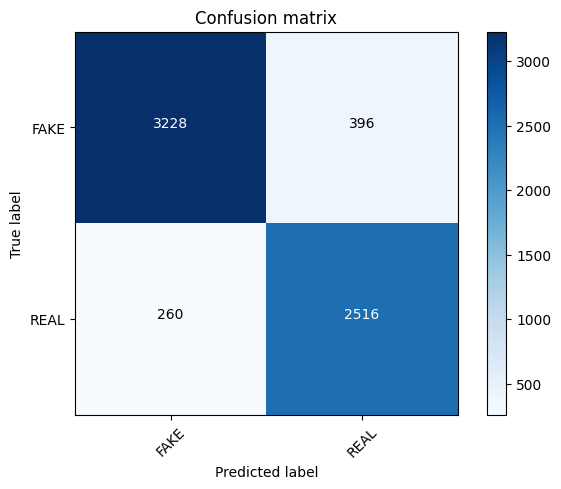

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score

pred = nb.predict(X_test)
acc = accuracy_score(y_test, pred)
cm = confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [29]:
print(f"Accuracy = {acc}")

Accuracy = 0.8975


In [31]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [32]:
cl = PassiveAggressiveClassifier()
cl.fit(X_train,y_train)

PassiveAggressiveClassifier()

Confusion matrix, without normalization


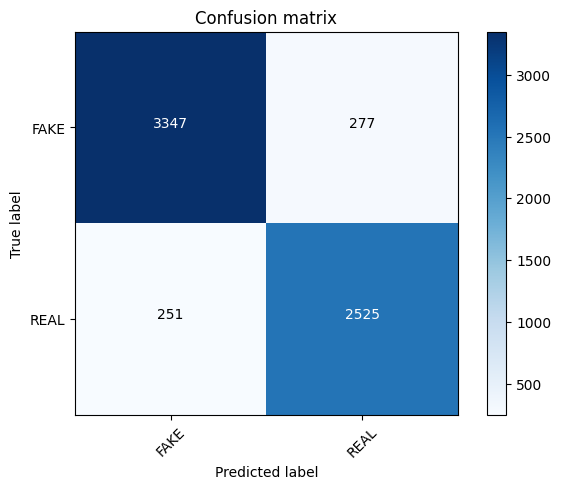

In [34]:
pred2 = cl.predict(X_test)
acc2 = accuracy_score(y_test, pred2)
cm2 = confusion_matrix(y_test, pred2)
plot_confusion_matrix(cm2, classes=['FAKE', 'REAL'])

In [35]:
print(f"Accuracy = {acc2}")

Accuracy = 0.9175


In [40]:
clf = MultinomialNB(alpha=0.1)

In [42]:
max_acc=0
for alpha in np.arange(0,1,0.1):
    classifier=MultinomialNB(alpha=alpha)
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy>max_acc:
        clf=classifier
    print(f"Alpha: %0.1f, Accuracy Score : {accuracy}"%alpha)

import warnings
warnings.filterwarnings('ignore')

/Users/virum/PycharmProjects/NLP/venv/lib/python3.11/site-packages/sklearn/naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/Users/virum/PycharmProjects/NLP/venv/lib/python3.11/site-packages/sklearn/naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Alpha: 0.0, Accuracy Score : 0.88703125
Alpha: 0.1, Accuracy Score : 0.90015625
Alpha: 0.2, Accuracy Score : 0.90109375
Alpha: 0.3, Accuracy Score : 0.89953125
Alpha: 0.4, Accuracy Score : 0.89984375
Alpha: 0.5, Accuracy Score : 0.89875
Alpha: 0.6, Accuracy Score : 0.89984375
Alpha: 0.7, Accuracy Score : 0.8990625
Alpha: 0.8, Accuracy Score : 0.89828125
Alpha: 0.9, Accuracy Score : 0.898125
